# Identifying viral genomes in human samples through Deep Learning

## ITCS 4156 - Machine Learning Final Project

Prakruthi Reddy & Nishitha Yza

In [0]:
import sys
assert sys.version_info >= (3, 5)

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0" # check if your ensorflow version is above 2.0

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests

SEQUENCES_URL = 'https://raw.githubusercontent.com/NeuroCSUT/ViraMiner/master/data/DNA_data/fullset_train.csv'

sequences = requests.get(SEQUENCES_URL).text.split('\n')
sequences = list(filter(None, sequences))  # This removes empty sequences.

# Let's print the first few sequences.
df = pd.DataFrame(sequences, index=np.arange(1, len(sequences)+1), 
             columns=['Sequences'])

df.head()

,Sequences
1,seq1006848_2014_P_Lagheden_Matti-HPV-vacc-CIN3...
2,"seq4116690_2014_G6_Hultin_MS,AACGAAGCACGGGCCGA..."
3,"seq360982_2014_F1_PARAFFINBLANKBLOCKS,TAGTGGGT..."
4,"seq1135576_2011_N19_VIRASKINFAPMISEQ,ATATGACCA..."
5,"seq277_2014_G6_Hultin_MS8,GGTCTTAAAACAACAGAAAT..."


In [0]:
val_seqs = []
val_labels = []
test_seqs=[]
test_labels=[]
seq_org=[]
labels_org=[]

In [0]:
def DNA_to_onehot(dna_line):
  options_onehot = {'A': [1,0,0,0,0],'C' :[0,1,0,0,0], 'G':[0,0,1,0,0] ,'T':[0,0,0,1,0],'N':[0,0,0,0,1]}
  onehot_data = map(lambda e: options_onehot[e], dna_line)
  # onehot_data = np.array(onehot_data)
  return onehot_data 

In [0]:
PROJECT_NAMES=[]
for line in sequences[:10000]:
    # line = line[:-1] #remove \n
    pieces = line.split(",")
    seq = pieces[1]
    label=int(pieces[2])
    proj = pieces[0][pieces[0].find("_"):].rstrip("1234567890")
    if proj not in PROJECT_NAMES:
        PROJECT_NAMES.append(proj)
    val_seqs.append(seq)
    val_labels.append(label)

In [0]:
val_seqs

['CAAGCCAAGATTTTCTCGCGTCACACTACTCATGACCATTGTATTATTAGGGGATTGGAATAATGAGTTACCTAAGCCTACAAATGCAGTTATCGCTGCATAGACAAATATCGGCGTATGGATATCTAAAAACATGTAACAAATCTGGGTAATTGACAAAATTGTTAATCCAGAAATAACTAAATATTTTGGCCCAAATTTATCCGTTAATAAGCCGCTTAATGGTGAGGCAACGACCATAACGACTGGGAAAACCATCATTAACATTCCTGCCACACTCGGTTTAAGATTTAAGGTACG',
 'AACGAAGCACGGGCCGAGAGATTGAGGAACCAAGGTCCAGCTCTAGAATCCAATTCTTCATCTTCCACCTCAACAGACGATGGTCCAGAGCCAGCCTATTCAAAAGTGGTTTCTGGTTATGAGCTCTTCCATTACGATCAACCTTTCTCATTAGATTATGGCGGTGAATTACCATCTTTCTCTCTAGCTTATGAAACATGGGGAAAACTCAACCCTTCAAAATCAAATTGCATTCTCCTACATACGGGTCTTTCAGCTTCTTCCCACGCAGCTTCAACTCCCAAGAACCCTTCCAAAGGT',
 'TAGTGGGTGAGGTTTCTATTTCCATAATGATCTCGCCTCAATTACTATAAGGTTCCGGACAAGGAATGCTTCTAACTGAGGGTCTCTAGATCGGCTATAGTCTTGATTGTTCCCCTCCCTTTGACAGCTCACTCAATGCTTCCTTTAATAACTTAATGTTTCCTTTCTTTTACCTATGCCATGATGCCCATAGGCAGCTTCTCTCTAATTGGATTTCCTTTTTCCCATATTTGGGAGTTTAGTTTTAGTCGCAGCACCACCTGTCCTTTATACACATCTCCTACCCCACGAGACGTAAAA',
 'ATATGACCATTCTTGCAAGGTAACACAGGTACATTTTCACAAAGTGAAGAATGAAGGTGATGTTAATTAGTACTTTCCACAGG

In [0]:
import numpy as np 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
integer_encoder = LabelEncoder()
one_hot_encoder = OneHotEncoder(categories='auto') 
input_features = [] 

for i in val_seqs:
  integer_encoded = integer_encoder.fit_transform(list(i))
  integer_encoded = np.array(integer_encoded).reshape(-1, 1)
  one_hot_encoded = one_hot_encoder.fit_transform(integer_encoded)
  input_features.append(one_hot_encoded.toarray())
  
np.set_printoptions(threshold=40)

In [0]:
input_features = np.stack(input_features)

In [0]:
# input1 = np.concatenate(input_features)

In [0]:
print(integer_encoder.classes_)

['A' 'C' 'G' 'T']


In [0]:
print("One Hot Encoding Example\n----------------------------\nDNA Sequence #1:\n",val_seqs[0][:12],'...',val_seqs[0][-12:])
print('One hot encoding of the sequence:\n',input_features[0])

One Hot Encoding Example
----------------------------
DNA Sequence #1:
 CAAGCCAAGATT ... ATTTAAGGTACG
One hot encoding of the sequence:
 [[0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]


In [0]:
one_hot_encoder = OneHotEncoder(categories='auto')
labels_list = np.array(val_labels).reshape(-1,1)
input_labels = one_hot_encoder.fit_transform(labels_list).toarray()

print('Labels:\n',labels_list.T)
print('One-hot encoded labels:\n',input_labels.T)

Labels:
 [[0 0 0 ... 1 0 0]]
One-hot encoded labels:
 [[1. 1. 1. ... 0. 1. 1.]
 [0. 0. 0. ... 1. 0. 0.]]


In [0]:
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(input_features, input_labels, test_size=0.25, random_state=42)

In [0]:
print('Train Features Shape: ', train_features.shape)
print('Train Labels Shape: ', train_labels.shape)
print('Test Features Shape: ', test_features.shape)
print('Test Labels Shape: ', test_labels.shape)

Train Features Shape:  (7500, 300, 4)
Train Labels Shape:  (7500, 2)
Test Features Shape:  (2500, 300, 4)
Test Labels Shape:  (2500, 2)


In [0]:
import numpy as np
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Dense, Conv1D, concatenate, Dropout
from tensorflow.keras.layers import GlobalMaxPooling1D,GlobalAveragePooling1D
from tensorflow.keras.callbacks import ModelCheckpoint, Callback, LearningRateScheduler
from tensorflow.keras.optimizers import Adam, Nadam,SGD

# Neural Network - Inspired by 'ViraMiner'

### Frequency Branch

In [0]:
inputs = Input(shape=(300,4)) # "5" because we have "ATGCN"

first_freq = Conv1D(1000,8, activation="relu")(inputs)
freq_pooling = GlobalAveragePooling1D()(first_freq) #returns one value per filter
drop_freq = Dropout(0.1)(freq_pooling)

fc_layer1 = Dense(1000, activation="relu", name="freq_fc_layer1")(drop_freq)
drop_fc = Dropout(0.1, name="drop_fc1")(fc_layer1)

final = Dense(2,activation="sigmoid")(drop_fc)

In [0]:
model = Model(inputs, final)
model.compile(optimizer = Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 300, 4)]          0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 293, 1000)         33000     
_________________________________________________________________
global_average_pooling1d_1 ( (None, 1000)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
freq_fc_layer1 (Dense)       (None, 1000)              1001000   
_________________________________________________________________
drop_fc1 (Dropout)           (None, 1000)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 2)                 2002

In [0]:
frequency = model.fit(train_features, train_labels, 
                    epochs=20)

Epoch 1/20
235/235 [==============================] - 19s 81ms/step - loss: 0.1128 - accuracy: 0.9792
Epoch 2/20
235/235 [==============================] - 19s 82ms/step - loss: 0.1005 - accuracy: 0.9801
Epoch 3/20
235/235 [==============================] - 19s 82ms/step - loss: 0.1027 - accuracy: 0.9801
Epoch 4/20
235/235 [==============================] - 19s 82ms/step - loss: 0.0994 - accuracy: 0.9801
Epoch 5/20
235/235 [==============================] - 19s 83ms/step - loss: 0.1003 - accuracy: 0.9801
Epoch 6/20
235/235 [==============================] - 19s 82ms/step - loss: 0.0997 - accuracy: 0.9801
Epoch 7/20
235/235 [==============================] - 19s 81ms/step - loss: 0.1000 - accuracy: 0.9801
Epoch 8/20
235/235 [==============================] - 19s 82ms/step - loss: 0.0979 - accuracy: 0.9801
Epoch 9/20
235/235 [==============================] - 19s 81ms/step - loss: 0.0987 - accuracy: 0.9801
Epoch 10/20
235/235 [==============================] - 19s 82ms/step - loss: 0.097

In [0]:
model.save("model.h5")
print("Saved model to disk")

Saved model to disk


In [0]:
_, accuracy = model.evaluate(train_features, train_labels)
print('Accuracy: %.2f' % (accuracy*100))

235/235 [==============================] - 7s 28ms/step - loss: 0.0868 - accuracy: 0.9801
Accuracy: 98.01


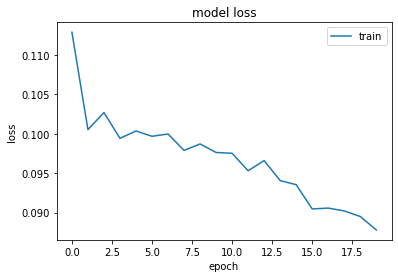

In [0]:
plt.figure()
plt.plot(frequency.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

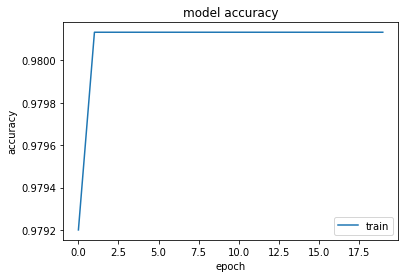

In [0]:
plt.figure()
plt.plot(frequency.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

In [0]:
test_predictions = model.predict(test_features)

In [0]:
_,accuracy = model.evaluate(test_features, test_labels)
print('Accuracy: %.2f' % (accuracy*100))

79/79 [==============================] - 2s 28ms/step - loss: 0.0792 - accuracy: 0.9836
Accuracy: 98.36


In [0]:
from sklearn.metrics import confusion_matrix
import itertools

cm = confusion_matrix(np.argmax(test_labels, axis=1), 
                      np.argmax(test_predictions, axis=1))
print('Confusion matrix:\n',cm)

Confusion matrix:
 [[2459    0]
 [  41    0]]


In [0]:
from sklearn.metrics import roc_auc_score
ro = roc_auc_score(test_labels, test_predictions)
print ("ROC area under the curve: ", ro)

ROC area under the curve:  0.7318511391701961


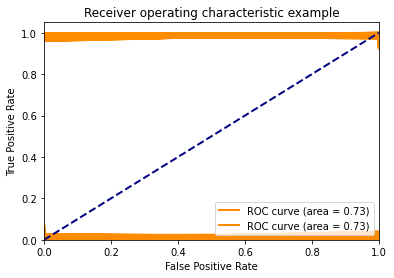

In [0]:
plt.figure()
lw = 2
plt.plot(test_labels, test_predictions, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % ro)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## Pattern Branch

In [0]:
inputs = Input(shape=(300,4)) # 5 because we allow "ATGCN", even though there is no N-s in our data

first_conv = Conv1D(1200, 11, activation="relu")(inputs)  
first_pool = GlobalMaxPooling1D()(first_conv) #returns one value per filter
drop1 = Dropout(0.1)(first_pool)

fc_layer1 = Dense(1200, activation="relu")(drop1)
drop2 = Dropout(0.1)(fc_layer1)

final = Dense(2,activation="sigmoid")(drop2)

In [0]:
model = Model(inputs, final)
model.compile(optimizer = Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 300, 4)]          0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 290, 1200)         54000     
_________________________________________________________________
global_max_pooling1d (Global (None, 1200)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 1200)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 1200)              1441200   
_________________________________________________________________
dropout_3 (Dropout)          (None, 1200)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 2)                 2402

In [0]:
pattern = model.fit(train_features, train_labels, epochs=20)

Epoch 1/20
235/235 [==============================] - 37s 158ms/step - loss: 0.1097 - accuracy: 0.9800
Epoch 2/20
235/235 [==============================] - 37s 158ms/step - loss: 0.0991 - accuracy: 0.9801
Epoch 3/20
235/235 [==============================] - 37s 157ms/step - loss: 0.0958 - accuracy: 0.9801
Epoch 4/20
235/235 [==============================] - 37s 157ms/step - loss: 0.0931 - accuracy: 0.9801
Epoch 5/20
235/235 [==============================] - 37s 158ms/step - loss: 0.0910 - accuracy: 0.9801
Epoch 6/20
235/235 [==============================] - 37s 158ms/step - loss: 0.0877 - accuracy: 0.9801
Epoch 7/20
235/235 [==============================] - 37s 157ms/step - loss: 0.0768 - accuracy: 0.9801
Epoch 8/20
235/235 [==============================] - 37s 157ms/step - loss: 0.0684 - accuracy: 0.9801
Epoch 9/20
235/235 [==============================] - 37s 158ms/step - loss: 0.0537 - accuracy: 0.9820
Epoch 10/20
235/235 [==============================] - 39s 166ms/step - l

In [0]:
model.save("model2.h5")
print("Saved model to disk")

Saved model to disk


In [0]:
_, accuracy = model.evaluate(train_features, train_labels)
print('Accuracy: %.2f' % (accuracy*100))

235/235 [==============================] - 13s 56ms/step - loss: 0.0026 - accuracy: 0.9999
Accuracy: 99.99


In [0]:
test_predictions = model.predict(test_features)

In [0]:
_,accuracy = model.evaluate(test_features, test_labels)
print('Accuracy: %.2f' % (accuracy*100))

79/79 [==============================] - 4s 55ms/step - loss: 0.1365 - accuracy: 0.9828
Accuracy: 98.28


In [0]:
cm = confusion_matrix(np.argmax(test_labels, axis=1), 
                      np.argmax(test_predictions, axis=1))
print('Confusion matrix:\n',cm)

Confusion matrix:
 [[2456    3]
 [  40    1]]


In [0]:
ro = roc_auc_score(test_labels, test_predictions)
print ("ROC area under the curve: ", ro)

ROC area under the curve:  0.687194378043821


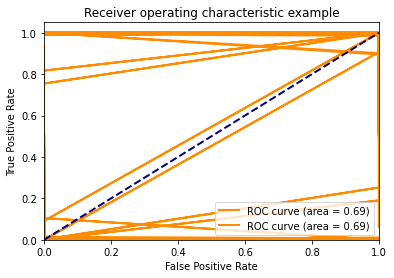

In [0]:
plt.figure()
lw = 2
plt.plot(test_labels, test_predictions, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % ro)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## ViraMiner

In [0]:
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [0]:
inputs = Input(shape=(300,4)) # "None" means any sequence length, "5" because we have "ATGCN"

# load pretrained models
freq_model = load_model('model.h5')
# freq_model.name = "freq_model"
pattern_model = load_model('model2.h5')
# pattern_model.name = "pat_model"


# THIS TURNS OFF TRAINING IN FIRST LAYERS
for layer in freq_model.layers:
    layer.trainable = False
for layer in pattern_model.layers:
    layer.trainable = False

freq_model_cropped = Model(freq_model.inputs, freq_model.layers[-3].output) # crop layers -1 and -2, i.e sigmoid and dropout 
pattern_model_cropped = Model(pattern_model.inputs, pattern_model.layers[-3].output)

freq_model_cropped.summary()
pattern_model_cropped.summary()

# Build a model with two branches
features1 = freq_model_cropped(inputs)
features2 = pattern_model_cropped(inputs)

#merge the branches
concatenation = concatenate([features1, features2])
drop_conc= Dropout(0.1)(concatenation)  # add a new dropout layer 
new_final =Dense(2,activation="sigmoid")(drop_conc)  # add a new output node


Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 300, 4)]          0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 293, 1000)         33000     
_________________________________________________________________
global_average_pooling1d_1 ( (None, 1000)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
freq_fc_layer1 (Dense)       (None, 1000)              1001000   
Total params: 1,034,000
Trainable params: 0
Non-trainable params: 1,034,000
_________________________________________________________________
Model: "model_4"
_________________________________________________________________
Layer (type)                 Out

In [0]:
model3 = Model(inputs, new_final)
model3.compile(optimizer = Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model3.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 300, 4)]     0                                            
__________________________________________________________________________________________________
model_3 (Model)                 (None, 1000)         1034000     input_9[0][0]                    
__________________________________________________________________________________________________
model_4 (Model)                 (None, 1200)         1495200     input_9[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 2200)         0           model_3[1][0]                    
                                                                 model_4[1][0]              

In [0]:
viraminer = model3.fit(train_features, train_labels, epochs=20)

Epoch 1/20
235/235 [==============================] - 22s 95ms/step - loss: 0.0476 - accuracy: 0.9860
Epoch 2/20
235/235 [==============================] - 23s 96ms/step - loss: 0.0115 - accuracy: 0.9969
Epoch 3/20
235/235 [==============================] - 22s 95ms/step - loss: 0.0079 - accuracy: 0.9984
Epoch 4/20
235/235 [==============================] - 22s 95ms/step - loss: 0.0064 - accuracy: 0.9976
Epoch 5/20
235/235 [==============================] - 22s 95ms/step - loss: 0.0068 - accuracy: 0.9983
Epoch 6/20
235/235 [==============================] - 22s 95ms/step - loss: 0.0040 - accuracy: 0.9993
Epoch 7/20
235/235 [==============================] - 26s 112ms/step - loss: 0.0053 - accuracy: 0.9981
Epoch 8/20
235/235 [==============================] - 22s 95ms/step - loss: 0.0046 - accuracy: 0.9983
Epoch 9/20
235/235 [==============================] - 22s 95ms/step - loss: 0.0037 - accuracy: 0.9991
Epoch 10/20
235/235 [==============================] - 22s 95ms/step - loss: 0.00

In [0]:
model3.save("model3.h5")
print("Saved model to disk")

Saved model to disk


In [0]:
_, accuracy = model3.evaluate(train_features, train_labels)
print('Accuracy: %.2f' % (accuracy*100))

235/235 [==============================] - 21s 90ms/step - loss: 9.9747e-04 - accuracy: 0.9999
Accuracy: 99.99


In [0]:
test_predictions_3 = model3.predict(test_features)

In [0]:
_,accuracy = model3.evaluate(test_features, test_labels)
print('Accuracy: %.2f' % (accuracy*100))

79/79 [==============================] - 7s 88ms/step - loss: 0.2048 - accuracy: 0.9836
Accuracy: 98.36


In [0]:
cm = confusion_matrix(np.argmax(test_labels, axis=1), 
                      np.argmax(test_predictions_3, axis=1))
print('Confusion matrix:\n',cm)

Confusion matrix:
 [[2458    1]
 [  40    1]]


In [0]:
ro = roc_auc_score(test_labels, test_predictions_3)
print ("ROC area under the curve: ", ro)

ROC area under the curve:  0.6817340977395134


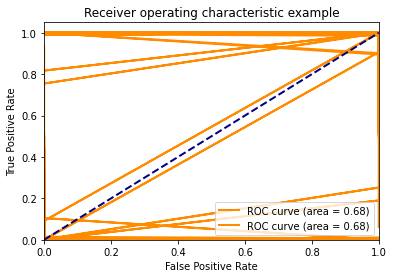

In [0]:
plt.figure()
lw = 2
plt.plot(test_labels, test_predictions, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % ro)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Neural Network - A single CNN Layer

In [0]:
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [0]:
# preparation
import tensorflow as tf
from tensorflow import keras 
# Common imports
import numpy as np
import pandas as pd
from copy import deepcopy as copy

In [0]:
from functools import partial
# TODO (1)
cnn = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(300,4)),
    tf.keras.layers.Conv1D(50,8, activation="relu"),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=2, activation='softmax'),
])

cnn.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 293, 50)           1650      
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 146, 50)           0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 7300)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 14602     
Total params: 16,252
Trainable params: 16,252
Non-trainable params: 0
_________________________________________________________________


In [0]:
# model4 = Model(inputs, final)
cnn.compile(optimizer = "nadam", loss='binary_crossentropy', metrics=['accuracy'])
# cnn.summary()

In [0]:
neural_net = cnn.fit(train_features, train_labels, epochs=10)

Epoch 1/10
235/235 [==============================] - 3s 11ms/step - loss: 0.1055 - accuracy: 0.9771
Epoch 2/10
235/235 [==============================] - 3s 11ms/step - loss: 0.0902 - accuracy: 0.9801
Epoch 3/10
235/235 [==============================] - 2s 11ms/step - loss: 0.0748 - accuracy: 0.9801
Epoch 4/10
235/235 [==============================] - 2s 11ms/step - loss: 0.0568 - accuracy: 0.9813
Epoch 5/10
235/235 [==============================] - 2s 10ms/step - loss: 0.0399 - accuracy: 0.9851
Epoch 6/10
235/235 [==============================] - 2s 11ms/step - loss: 0.0238 - accuracy: 0.9913
Epoch 7/10
235/235 [==============================] - 2s 10ms/step - loss: 0.0133 - accuracy: 0.9971
Epoch 8/10
235/235 [==============================] - 2s 11ms/step - loss: 0.0079 - accuracy: 0.9989
Epoch 9/10
235/235 [==============================] - 2s 11ms/step - loss: 0.0050 - accuracy: 1.0000
Epoch 10/10
235/235 [==============================] - 2s 11ms/step - loss: 0.0032 - accura

In [0]:
test_predictions = cnn.predict(test_features)

In [0]:
from sklearn.metrics import confusion_matrix
import itertools


In [0]:
cm = confusion_matrix(np.argmax(test_labels, axis=1), 
                      np.argmax(test_predictions, axis=1))
print('Confusion matrix:\n',cm)

Confusion matrix:
 [[2456    3]
 [  41    0]]


In [0]:
from sklearn.metrics import roc_auc_score
ro = roc_auc_score(test_labels, test_predictions_5)
print ("ROC area under the curve: ", ro)

ROC area under the curve:  0.4719918864499747


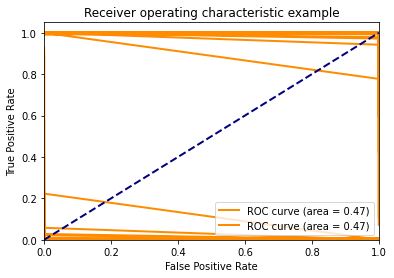

In [0]:
plt.figure()
lw = 2
plt.plot(test_labels, test_predictions, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % ro)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [0]:
cnn.save("model5.h5")
print("Saved model to disk")

Saved model to disk


In [0]:
_, accuracy = cnn.evaluate(train_features, train_labels)
print('Accuracy: %.2f' % (accuracy*100))

235/235 [==============================] - 1s 3ms/step - loss: 0.0020 - accuracy: 1.0000
Accuracy: 100.00


In [0]:
test_predictions_5 = cnn.predict(test_features)

In [0]:
_,accuracy = cnn.evaluate(test_features, test_labels)
print('Accuracy: %.2f' % (accuracy*100))

79/79 [==============================] - 0s 4ms/step - loss: 0.1592 - accuracy: 0.9824
Accuracy: 98.24


### References
This project has been heavily inspired by 'ViraMiner' and 'DeepVirFinder' - two great existing models that use Convolutional Neural Networks.

[1] Deyou Tang, Bingrui Li, Tianyi Xu, Ruifeng Hu, Daqiang Tan, Xiaofeng Song, Peilin Jia, Zhongming Zhao. “VISDB: a manually curated database of viral integration sites in the human genome”  
[2] Talia Kustin, Guy Ling, Sivan Sharabi, Daniela Ram, Nehemya Friedman, Neta Zuckerman, Efrat Dahan Bucris, Aharona Glatman-Freedman, Adi Stern & Michal Mandelboim “A method to identify respiratory virus infections in clinical samples using next-generation sequencing”  
[3] Ardi Tampuu, Zurab Bzhalava, Joakim Dillner, Raul Vicente. “ViraMiner: Deep learning on raw DNA sequences for identifying viral genomes in human samples”   
[4] Zurab Bzhalava, Ardi Tampuu, Piotr Bała, Raul Vicente & Joakim Dillner. “Machine Learning for detection of viral sequences in human metagenomic datasets”   
[5] Ren J, Ahlgren NA, Lu YY, Fuhrman JA, Sun F. VirFinder. “A novel k-mer based tool for identifying viral sequences from assembled metagenomic data.”    
[6] Deyvid Amgarten, Lucas P. P. Braga, Aline M. da Silva, and João C. Setubal. “MARVEL, a Tool for Prediction of Bacteriophage Sequences in Metagenomic Bins”    
[7] Jie Ren, Kai Song, Chao Deng, Nathan A. Ahlgren, Jed A. Fuhrman, Yi Li, Xiaohui Xie, Ryan Poplin & Fengzhu Sun. “Identifying viruses from metagenomic data using deep learning”   
